<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  FINAL PROJECT: RESEARCHING ON HOTEL BOOKING DEMAND 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Data preprocessing 📌
</div>

## **STUDENT INFORMATION** 📝

<div align="center">

| Student ID | Fullname                      |
|:------------:|:---------------------------:|
| 21127063   | Nguyễn Văn Đăng Huỳnh     |
| 21127528   | Nguyễn Thị Minh Minh      |
</div>


## **TABLE OF CONTENTS** 🔠 

1. [Library in used](#c1)
2. [Overal insight into data](#c2)
3. [Process data](#c3)
    1. [Data cleaning:](#c3.1)
        * Check for missing values
        * Check for duplicated values
        * Rename columns for better reading
    2. [Data exploration](#c3.2)
        * Check on data types
        * Identify numerical and categorical variables
        * Comment on the statistics of numerical and categorical variables
    3. [Data Distribution](#c3.3)
        * Numeric and date-time data types
        * Classified data types
        * String data types
4. [Data information after preprocessing](#c4)

## **IMPORT LIBRARY** 🎄<a class="anchor" id="c1"></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **OVERAL INSIGHT INTO DATA** 📝<a class="anchor" id="c2"></a>

In [64]:
pd.set_option('display.max_columns', None)
raw_df = pd.read_csv("./data/raw_data/raw_data.csv")
raw_df.sample(5)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel_type
15908,0,66,2015,August,32,3,1,3,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,F,0,No Deposit,NULL,NULL,0,Transient,168.25,0,0,Check-Out,2015-08-07,resort hotel
78446,0,2,2015,October,41,4,2,4,1,0.0,0,BB,JPN,Direct,Direct,0,0,0,D,D,0,No Deposit,NULL,NULL,0,Transient,145.00,0,1,Check-Out,2015-10-10,city hotel
13961,0,1,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,2,12,A,E,0,No Deposit,NULL,135,0,Transient,75.00,1,2,Check-Out,2017-06-01,resort hotel
31756,0,1,2017,January,1,5,0,1,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,NULL,0,Transient,58.00,0,1,Check-Out,2017-01-06,resort hotel
69188,1,131,2017,May,21,26,2,2,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,108.00,0,1,Canceled,2017-02-18,city hotel


In [65]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

## **LET'S PROCESS** 📝<a class="anchor" id="c3"></a>

### **1. Data Cleaning** 🔃 <a class="anchor" id="c3.1"></a>

1.1 Check for missing values: <a class="anchor" id="c3.1.1"></a>

In [66]:
raw_df.isnull().sum()[raw_df.isnull().sum() != 0]

Children      4
Country     488
dtype: int64

`COMMENT:` 
- Among 119390 entries, there only exists about `488 + 4 = 492` missing values. This is a good signal for our collected data.
- With column `Children` with 4 missing values, we decide to impute the data with median value.
- About the column `Country`, 488 missing values on total of 119390 entries are still in safe control zone (0.4% missing values). Therefore, we decide to ignore that.

In [67]:
# fill missing values on Children column with median
raw_df['Children'].fillna(raw_df['Children'].median(), inplace=True)

1.2 Check for duplicated value:

In [68]:
num_duplicated_rows = raw_df.duplicated().sum()
print(f'Number of duplicated rows: {num_duplicated_rows}')

Number of duplicated rows: 31994


In [69]:
duplicate_rows = raw_df[raw_df.duplicated()]
duplicate_rows

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel_type
5,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,resort hotel
22,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,NULL,0,Transient,84.67,0,1,Check-Out,2015-07-07,resort hotel
43,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,137.00,0,1,Check-Out,2015-07-07,resort hotel
138,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,NULL,0,Transient,97.00,0,0,Canceled,2015-07-01,resort hotel
200,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,109.80,0,3,Check-Out,2015-07-08,resort hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,126.00,0,2,Check-Out,2017-09-03,city hotel
119352,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,city hotel
119353,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,city hotel
119354,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,city hotel


🚨 We will drop 31994 duplicated rows. 

In [70]:
raw_df = raw_df.drop_duplicates()

# check if there are still duplicated rows
num_duplicated_rows = raw_df.duplicated().sum()
print(f'Number of duplicated rows: {num_duplicated_rows}')

Number of duplicated rows: 0


1.3 Rename columns for better reading

In [71]:
# rename columns
def new_name(name):
    return ''.join(['_' + i.lower() if i.isupper() else i for i in name]).lstrip('_')


raw_df.columns = [new_name(name) for name in raw_df.columns]
raw_df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'a_d_r',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'hotel_type'],
      dtype='object')

### **2. Data Exploration** 🔭 <a class="anchor" id="c3.2"></a>

2.1 Check on data types:

In [72]:
# Check for data type
raw_df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                              object
company                           

In [73]:
raw_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_type
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotel
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotel
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort hotel


`COMMENT:` Base on the annotation table of those features listed before.

- As we have processed above, there are no `null` value left. However, in the display samples above, some columns instead of being left empty are filled with the string `NULL` (column `agent` and `company`).
- This will cause problems when we calculate missing ratios so we will replace these values with NULL value.

In [74]:
raw_df.replace('       NULL', '', inplace=True)
raw_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_type
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,,,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotel
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,,,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotel
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,,,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort hotel


`COMMENT:` Now, you can see at the column `agent` and `company`, NULL string is replaced with empty.

2.2 Identify numerical and categorical features:

a. Observing categorical features:

🌟 Now, we will dig into what inside an object/ categorical variables have

In [75]:
def open_object_dtype(s):
    dtypes_op = set()
    dtypes_op.update(s.apply(type))
    return list(dtypes_op)  # Chuyển đổi set thành list


categorical_vars = raw_df[raw_df.dtypes.index[raw_df.dtypes == object]].apply(open_object_dtype)
print(categorical_vars)
print(f'Number of categorical variables: {len(categorical_vars)}')

arrival_date_month                          [<class 'str'>]
meal                                        [<class 'str'>]
country                    [<class 'float'>, <class 'str'>]
market_segment                              [<class 'str'>]
distribution_channel                        [<class 'str'>]
reserved_room_type                          [<class 'str'>]
assigned_room_type                          [<class 'str'>]
deposit_type                                [<class 'str'>]
agent                                       [<class 'str'>]
company                                     [<class 'str'>]
customer_type                               [<class 'str'>]
reservation_status                          [<class 'str'>]
reservation_status_date                     [<class 'str'>]
hotel_type                                  [<class 'str'>]
dtype: object
Number of categorical variables: 14


🌟 We see that at the `country` column, there are some rows containing `float` dtype.\
🌟 `country` should be in `string` dtype. So, we will astype the column to `string`

b. Observing numerical features:

In [76]:
continuous_vars = raw_df.select_dtypes(include=['float64', 'int64']).columns
print("Continuous Variables:", continuous_vars)
print(f'\nNumber of continuous variables: {len(continuous_vars)}')

Continuous Variables: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'a_d_r', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

Number of continuous variables: 18


c. Comment session 📈

- Most of the columns has the correct data type.
- The `is_cancelled`, `is_repeated_guest` columns should be in bool data type.
- The `reservation_status_date` column should be in date-time data type.
- The `children` column should be in integer data type.
- The `country` column should be in string data type.

| Feature                           | Correct data type         |
|:---------------------------------|:-------------------------:|
| `is_canceled`                      | False (convert to bool)   |
| `lead_time`                        | True                      |
| `arrival_date_year`                 | True                      |
| `arrival_date_month`                | True                      |
| `arrival_date_week_number`           | True                      |
| `arrival_date_day_of_month`           | True                      |
| `stays_in_weekend_nights`            | True                      |
| `stays_in_week_nights`               | True                      |
| `adults`                          | True                      |
| `children`                        | False (convert to int)    |
| `babies`                          | True                      |
| `meal`                            | True                      |
| `country`                         | False (convert to string) |
| `market_segment`                   | True                      |
| `distribution_channel`             | True                      |
| `is_repeated_guest`                   | False (convert to bool)   |
| `previous_cancellations`           | True                      |
| `previous_bookings_not_canceled`    | True                      |
| `reserved_room_type`                | True                      |
| `assigned_room_type`                | True                      |
| `booking_changes`                  | True                      |
| `deposit_type`                     | True                      |
| `agent`                           | True                      |
| `company`                         | True                      |
| `days_in_waiting_list`               | True                      |
| `customer_type`                    | True                      |
| `a_d_r`                             | True                      |
| `required_car_parking_spaces`        | True                      |
| `total_of_special_requests`          | True                      |
| `reservation_status`               | True                      |
| `reservation_status_date`           | False (convert to date-time)|


d. Solve the problem stated:

In [77]:
# Convert to date-time
raw_df['reservation_status_date'] = pd.to_datetime(raw_df['reservation_status_date'], format='%Y-%m-%d')

# Convert to bool
raw_df['is_canceled'] = raw_df['is_canceled'].astype(bool)
raw_df['is_repeated_guest'] = raw_df['is_repeated_guest'].astype(bool)

# Convert to int
raw_df['children'] = raw_df['children'].astype('Int64')

#Convert to string
raw_df['country'] = raw_df['country'].replace(to_replace=np.nan, value='')


👀 After converting our data to their correct type, let's take a look again of the data types.

In [78]:
data_type_df = raw_df.apply(open_object_dtype).transpose()
data_type_df.columns = ['Data type']
data_type_df

,Data type
is_canceled,<class 'bool'>
lead_time,<class 'int'>
arrival_date_year,<class 'int'>
arrival_date_month,<class 'str'>
arrival_date_week_number,<class 'int'>
arrival_date_day_of_month,<class 'int'>
stays_in_weekend_nights,<class 'int'>
stays_in_week_nights,<class 'int'>
adults,<class 'int'>
children,<class 'int'>


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FFC436; padding-left: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
Our data is now in their correct types. 🎊🎊🎊
</div>

2.3 Comment the statistics of numerical and categorical variables

In [79]:
# Numerical variables
raw_df[continuous_vars].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,a_d_r,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.0,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567
std,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.0,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


`COMMENT:` All the data statistics are stable and normal.

In [80]:
# Categorical variables (object)
categorical_vars = raw_df[raw_df.dtypes.index[raw_df.dtypes == object]].columns
raw_df[categorical_vars].describe()

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,hotel_type
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396
unique,12,5,178,8,5,10,12,3,334,353,4,3,2
top,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,,Transient,Check-Out,city hotel
freq,11257,67978,27453,51618,69141,56552,46313,86251,28759,82137,71986,63371,53428


`COMMENT:` All the data statistics are stable and normal.

### **3. Data Distribution** 🧮 <a class="anchor" id="c3.3"></a>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding-left: 25px; font-size: 20px; font-weight: bold; border-radius: 0 0 0 0">
  3.1 Numeric and date-time data types:
</div>

❄️  For columns with numeric data types, we will calculate:   
- `Percentage` (from 0 to 100) of missing values
- The `min`
- The `lower quartile` (phân vị 25)
- The `median` (phân vị 50)
- The `upper quartile` (phân vị 75)
- The `max`

❄️  First we need to select columns with numeric and date-time data type.

In [81]:
num_col_info_df = raw_df.select_dtypes(include=['number', 'datetime'])
num_col_info_df = pd.DataFrame(num_col_info_df)

❄️  Then we calculate the descriptive statistics and show the values.

In [82]:
missing_ratio = num_col_info_df.isna().mean() * 100
min = num_col_info_df.quantile(0)
lower_quartile = num_col_info_df.quantile(0.25)
median = num_col_info_df.quantile(0.5)
upper_quartile = num_col_info_df.quantile(0.75)
max = num_col_info_df.quantile(1)

In [83]:
num_col_info_df = pd.DataFrame(data=[missing_ratio, min, lower_quartile, median, upper_quartile, max],
                               index=['Missing Ratios', 'Min', 'Lower Quartile', 'Median', 'Upper Quartile', 'Max'],
                               columns=num_col_info_df.columns)
num_col_info_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status_date
Missing Ratios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
Min,0.0,2015.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.38,0.0,0.0,2014-10-17 00:00:00
Lower Quartile,11.0,2016.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,72.00,0.0,0.0,2016-03-18 00:00:00
Median,49.0,2016.0,27.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,98.10,0.0,0.0,2016-09-08 00:00:00
Upper Quartile,125.0,2017.0,37.0,23.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,134.00,0.0,1.0,2017-03-05 00:00:00
Max,737.0,2017.0,53.0,31.0,19.0,50.0,55.0,10.0,10.0,26.0,72.0,21.0,391.0,5400.00,8.0,5.0,2017-09-14 00:00:00


### 📈 Some comments:
- The missing ratios for numeric and datetime columns are pretty low. Only `children` column has missing data, the other columns don't have. This missing data can be due to the data collecting step.
- For column `children`, `babies`, `previous_cancellations`, `previous_booking_not_canceled`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces` and `total_of_special_requests`, the min, lower quartile, median and upper quartile are all 0, which means that most of the data in these columns are 0.
    - The data of `children` and `babies` containing most of 0 means that there's not many family travelling with their childrens or babies.
    - The data of `required_car_parking_spaces` containing most of 0 means that many families travelled without using cars. 
    - For `previous_cancellations`, maybe the guests were new to the hotel or maybe this shows for the high quality of the hotel since many of their guests hadn't make any cancellation.
    - For `days_in_waiting_list`, this shows for the professional of the hotel since many of their guests didn't have to wait.
- Most of the columns have the max value pretty high compared to the upper quartile value. Some can be considered as outliers.
- The min and max value of `reservation_status_date` column shows that the data was collected from 17/10/2014 to 14/09/2017. This is reasonable since the min and max of `arrival_date_year` are also 2015 and 2017 respectively.


👀  Now let's take a look at columns with wide range of value. We will consider `lead_time`, `arrival_date_week_number`, `arrival_date_day_of_month` and `a_d_r`. 

Text(0.5, 0, 'ADR')

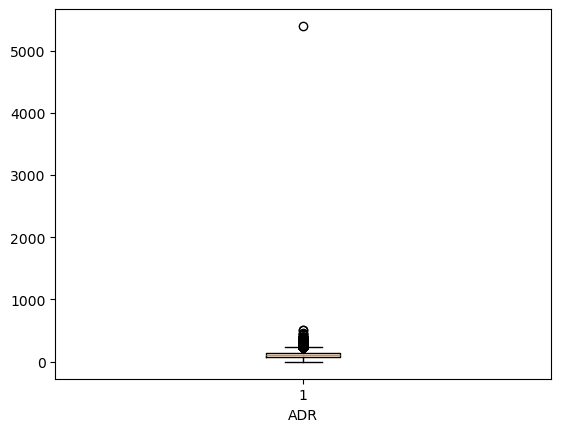

In [84]:
plt.boxplot(raw_df['a_d_r'])
plt.xlabel('ADR')

* Now, we limit the y-axis for better visualization

Text(0.5, 0, 'ADR')

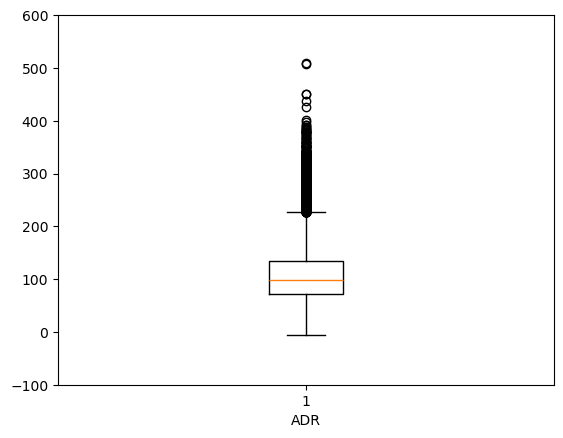

In [85]:
plt.boxplot(raw_df['a_d_r'])
plt.ylim(-100, 600)
plt.xlabel('ADR')

* There's some outlier ( > 400) that has the value quite high compared to other points so we first eliminate it from the data samples.

🔍 Based on the boxplot, 50% of the data converge around 100 points. There's a lot of outliers converge from 250 to 550 points. The value for min is approximately 0 and for max is approximately 250 (we don't consider outliers here).   
🔍 The median value is approximately 100 points.   

👀 And let's see how many outliers we have.

In [86]:
def count_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

In [87]:
count_outliers(raw_df['a_d_r'])

2490

There are 2482 outliers for `ADR` column. This number of outliers seems pretty high but when compared to the size of the data, this is pretty small.

👀 Next we will plot data of `arrival_date_week_number` and `arrival_date_day_of_month`.

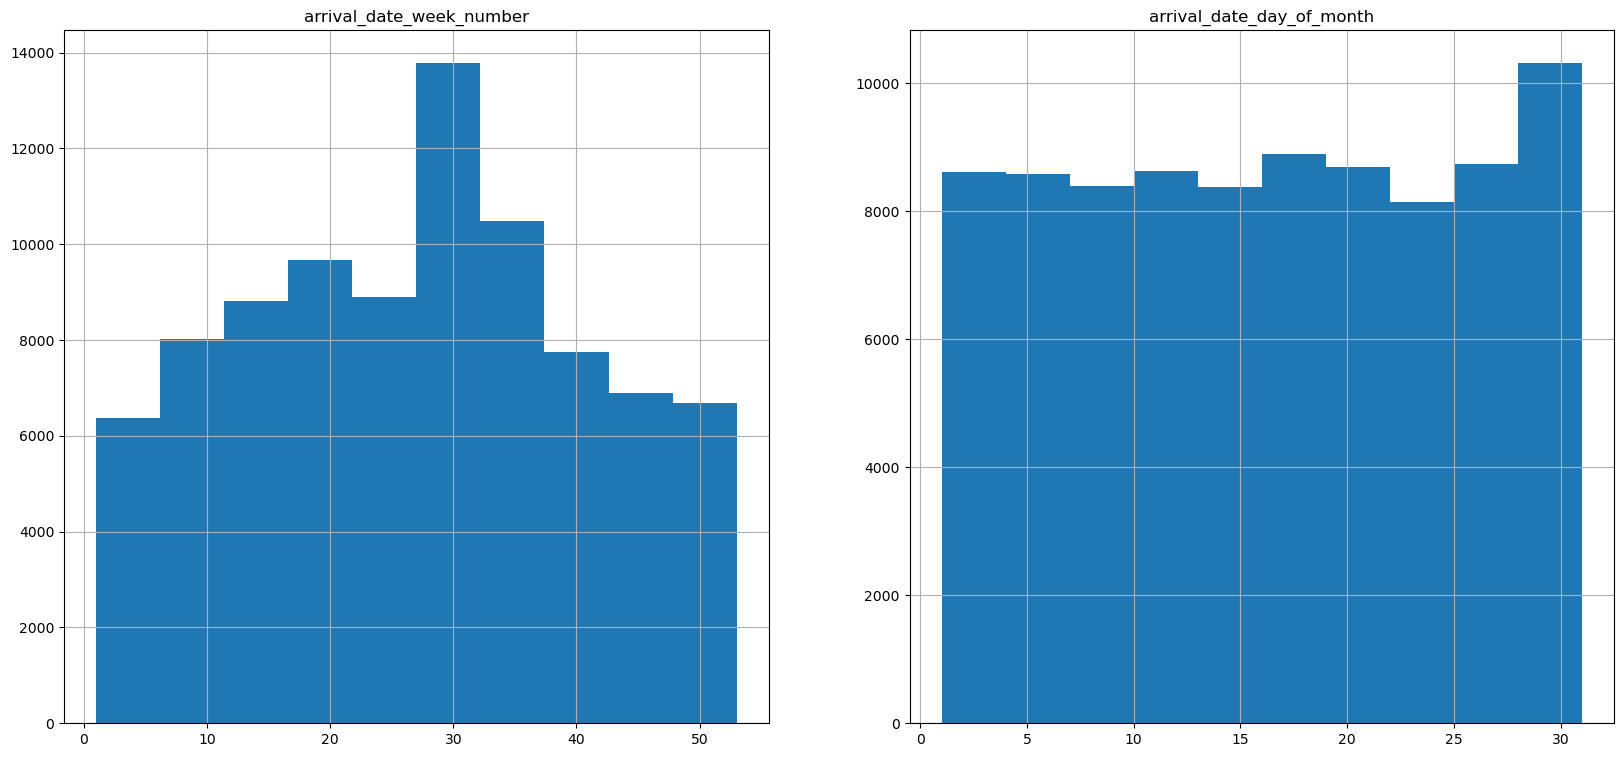

In [88]:
# Create fig and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
axes = axes.flatten()

# Plot histograms for each axe
axes[0].hist(raw_df['arrival_date_week_number'])
axes[0].set_title('arrival_date_week_number')
axes[0].grid()

axes[1].hist(raw_df['arrival_date_day_of_month'])
axes[1].set_title('arrival_date_day_of_month')
axes[1].grid()

plt.show()

🔍 Based on the histograms, we can see that the data of `ArrivalDateDayOfMonth` distributes evenly from above 0 to approximately 30. The highest distribution for this column is around 30 means that people are likely to travel during the end of month (approximately 10000 bookings on day 30).   
🔍 For `ArrivalDateWeekNumber`, people likely to travel during week 30 of the year which is the middle of the year (approximately 14000 bookings). The distributions of other weeks are pretty even.

👀 Continue for the `LeadTime`

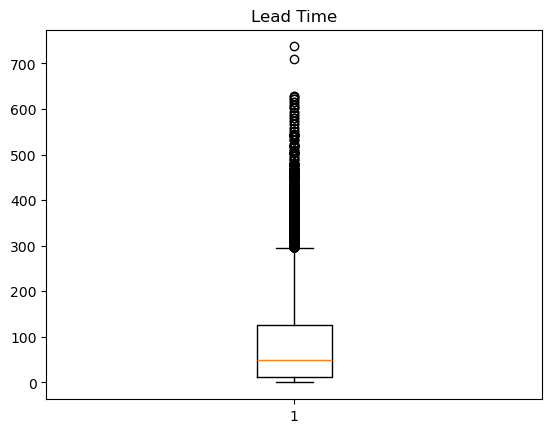

In [89]:
plt.boxplot(raw_df['lead_time'])
plt.title('Lead Time')
plt.show()

🔍  More than 50% of the data converge from 0 to more than 100 with the median value around 50 days.   
🔍  Min and max of the `lead_time` are approximately 0 and more than 700 days respectively.   
🔍  The outliers have the value much higher than other values with more than 300 days of `lead_time`.  
🔍  Compared with other outliers, there are two outliers staying quite separately (>700) so let's eliminate them.

In [90]:
raw_df = raw_df[raw_df['lead_time'] < 700]

In [91]:
count_outliers(raw_df['lead_time'])

2394

🔍  The number of outliers of `LeadTime` is approximately to that of `ADR`.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding-left: 25px; font-size: 20px; font-weight: bold; border-radius: 0 0 0 0">
  3.2 With classified data types:
</div>

🌸 For this part, we will consider bool data type only since our data doesn't have column represents for Id.

✨ First, let's extract the columns with bool data type.

In [92]:
bool_col_df = raw_df[['is_canceled', 'is_repeated_guest']]

✨ We will calculate missing ratios, number of different values and those values.

In [93]:
# Calculate missing ratios, number of different values and those values
missing_ratio = bool_col_df.isna().mean() * 100
num_diff_vals = bool_col_df.nunique().to_numpy()
value_counts_dict = np.vectorize(lambda column: dict(bool_col_df[column].value_counts()))(bool_col_df.columns)

# Create a dataframe to show data
bool_col_profile = pd.DataFrame({'missing_ratio': missing_ratio,
                                 'num_diff_vals': num_diff_vals, 
                                 'distribution': value_counts_dict})
bool_col_profile = bool_col_profile.transpose()
bool_col_profile.columns = ['is_canceled', 'is_repeated_guest']

# Show data
bool_col_profile

,is_canceled,is_repeated_guest
missing_ratio,0.0,0.0
num_diff_vals,2,2
distribution,"{False: 63369, True: 24025}","{False: 83979, True: 3415}"


🔍 These two columns don't have missing data which is a great thing.   
🔍 There are 2 values for both columns, True and False.   
🔍 The number of False value is much higher than that of True value on both columns.

👀 Let's plot the data for clearer understanding.

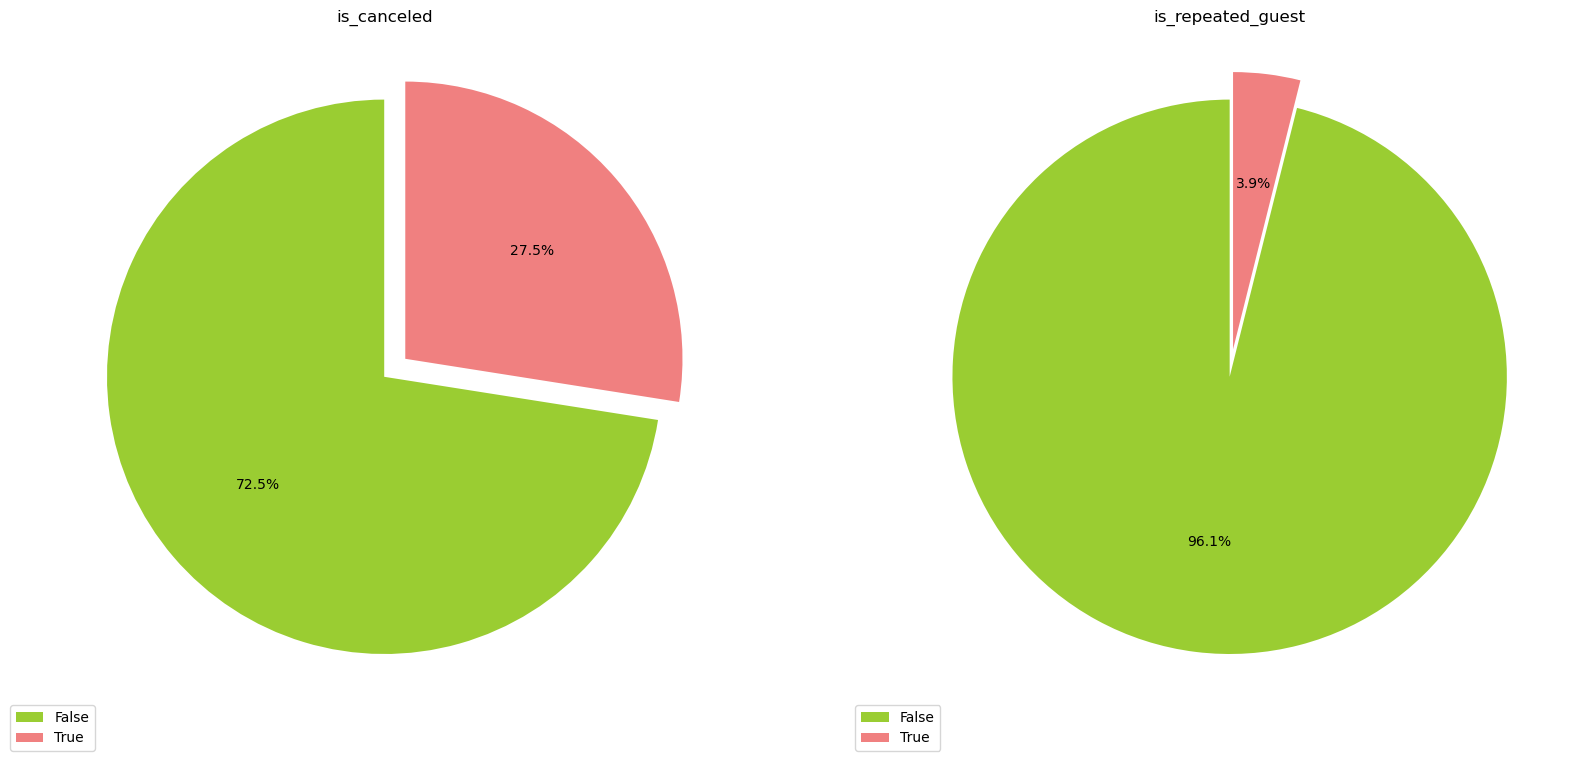

In [94]:
# Create fig and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
axes = axes.flatten()

# Define column names
cols = ['is_canceled', 'is_repeated_guest']

# Plot histograms for each axe
for i in range(2):
    data_dict = raw_df[cols[i]].value_counts().to_dict()
    labels = list(data_dict.keys())
    sizes = list(data_dict.values())
    explode = (0, 0.1)
    colors = ['yellowgreen', 'lightcoral']

    axes[i].pie(sizes, labels=None, explode = explode, autopct='%1.1f%%', colors = colors, startangle=90)
    axes[i].set_title(cols[i])
    axes[i].set_aspect('equal')
    axes[i].legend(labels, loc='lower left', bbox_to_anchor=(-0.05, -0.05))

plt.show()

There's nothing abnormal in our bool data columns 🎊🎊🎊.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding-left: 25px; font-size: 20px; font-weight: bold; border-radius: 0 0 0 0">
  3.3 With string data types:
</div>

🌸 For string data type, we will calculate missing ratios, number of different values and those values.

✨ First we will extract these columns.

In [95]:
str_df = raw_df.select_dtypes(include=['object'])
str_df

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,hotel_type
0,July,BB,PRT,Direct,Direct,C,C,No Deposit,,,Transient,Check-Out,resort hotel
2,July,BB,GBR,Direct,Direct,A,C,No Deposit,,,Transient,Check-Out,resort hotel
3,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,304,,Transient,Check-Out,resort hotel
4,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240,,Transient,Check-Out,resort hotel
6,July,BB,PRT,Direct,Direct,C,C,No Deposit,,,Transient,Check-Out,resort hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,394,,Transient,Check-Out,city hotel
119386,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,9,,Transient,Check-Out,city hotel
119387,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,9,,Transient,Check-Out,city hotel
119388,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,89,,Transient,Check-Out,city hotel


✨ Then we will calculate missing ratios and different values.

In [96]:
# Calculate for missing values
missing_ratio = (str_df == '').mean()

# Calculate for different values
num_diff_vals = str_df.nunique().to_numpy()
value_counts_dict = np.vectorize(lambda column: dict(str_df[column].value_counts()))(str_df.columns)

# Create dataframe to show values
string_profile = pd.DataFrame({'missing_ratio': missing_ratio,
                                'num_diff_vals': num_diff_vals, 
                                'distribution': value_counts_dict})
string_profile = string_profile.transpose()
string_profile.columns = str_df.columns

In [97]:
string_profile

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,hotel_type
missing_ratio,0.0,0.0,0.005172,0.0,0.0,0.0,0.0,0.0,0.139495,0.939824,0.0,0.0,0.0
num_diff_vals,12,5,178,8,5,10,12,3,334,353,4,3,2
distribution,"{'August': 11257, 'July': 10056, 'May': 8355, ...","{'BB ': 67977, 'SC ': 9481, 'HB ...","{'PRT': 27452, 'GBR': 10432, 'FRA': 8837, 'ESP...","{'Online TA': 51618, 'Offline TA/TO': 13889, '...","{'TA/TO': 69141, 'Direct': 12986, 'Corporate':...","{'A ': 56552, 'D '...","{'A ': 46313, 'D '...","{'No Deposit ': 86249, 'Non Refund ': ...","{' 9': 28759, ' 240': 13028, '...","{'': 82135, ' 40': 851, ' 223':...","{'Transient': 71984, 'Transient-Party': 11727,...","{'Check-Out': 63369, 'Canceled': 23011, 'No-Sh...","{'city hotel': 53428, 'resort hotel': 33966}"


🔍 There are 3 columns that have missing values.   
$\;\;\;\;\;\;$✨ `country` has a very small amount of missing values.   
$\;\;\;\;\;\;$✨ `company` has a very high amount of missing values, this means that many customers didn't choose to book hotel through a company. So we can consider to remove this column.   
$\;\;\;\;\;\;$✨ `agent` has 0.139514 percent of missing ratio.   
🔍 `country`, `agent` and `company` are columns with the most variety of unique values (178, 334 and 353 respectively).
🔍 `arrival_date_month` has 12 unique values represent for 12 months of the year which is reasonable.   
🔍 `reserved_room_type` and `assigned_room_type` have diffrent number of unique values meaning that there are customers who have been assigned to different rooms from their reserved rooms.   

So we will remove column `Company` from our data

In [98]:
raw_df.drop('company', axis=1, inplace=True)
str_df.drop('company', axis=1, inplace=True)

👀 Now let's visualize the data.

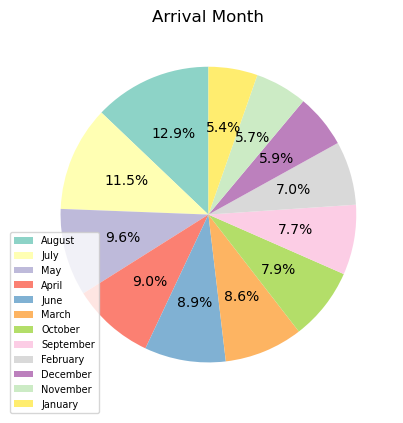

In [99]:
# Take out month data
months = str_df['arrival_date_month'].value_counts().to_dict()
labels = list(months.keys())
sizes = list(months.values())

# Define colors
colors = plt.cm.Set3.colors

# Plot pie chart
plt.pie(sizes, labels=None, autopct='%1.1f%%', colors=colors, startangle=90, radius=1)
plt.title('Arrival Month')
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.05, -0.05), prop={'size': 7})
plt.show()

✨ Among all months of the year, August, July and May are the months with the highest bookings.   
✨ January is the month with the least number of bookings.

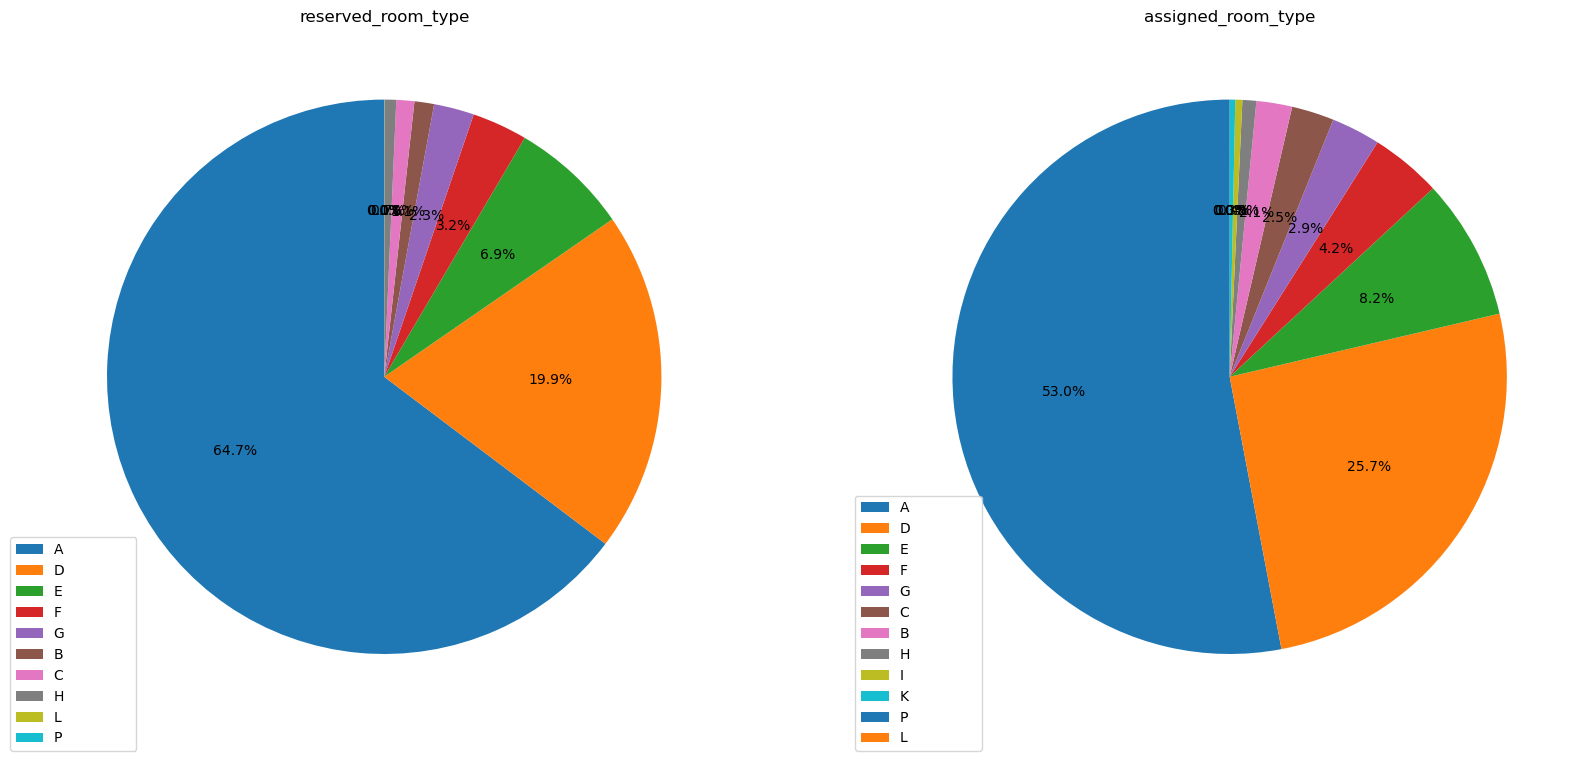

In [100]:
# Create fig and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
axes = axes.flatten()

# Define column names
cols = ['reserved_room_type', 'assigned_room_type']

# Plot histograms for each axe
for i in range(2):
    data_dict = string_profile[cols[i]]['distribution']
    labels = list(data_dict.keys())
    sizes = list(data_dict.values())
    
    axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(cols[i])
    axes[i].set_aspect('equal')
    axes[i].legend(labels, loc='lower left', bbox_to_anchor=(-0.05, -0.05))

plt.show()

✨ It seems like people didn't like to I and K room type since these two types don't exist in `reserved_room_type`.    
✨ A is the room type that had the highest bookings. But when the hotel assigned the room for customers, the percent of this type drop approximately 10%, this maybe they ran out of these rooms.

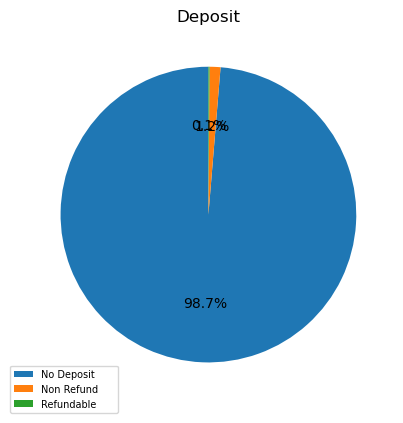

In [101]:
# Take out deposit data
deposit = str_df['deposit_type'].value_counts().to_dict()
labels = list(deposit.keys())
sizes = list(deposit.values())

# Plot pie chart
plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, radius=1)
plt.title('Deposit')
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.05, -0.05), prop={'size': 7})
plt.show()

✨ Most of the data is no deposit type.

### **4. Data information after preprocessing** ✅ <a class="anchor" id="c3.4"></a>

In [102]:
raw_df.reset_index(drop=True, inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87394 entries, 0 to 87393
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     87394 non-null  bool          
 1   lead_time                       87394 non-null  int64         
 2   arrival_date_year               87394 non-null  int64         
 3   arrival_date_month              87394 non-null  object        
 4   arrival_date_week_number        87394 non-null  int64         
 5   arrival_date_day_of_month       87394 non-null  int64         
 6   stays_in_weekend_nights         87394 non-null  int64         
 7   stays_in_week_nights            87394 non-null  int64         
 8   adults                          87394 non-null  int64         
 9   children                        87394 non-null  Int64         
 10  babies                          87394 non-null  int64         
 11  me

`COMMENT`:
Finally, we finish in preprocessing the data.
- With total 119390 entries before processing, after being eliminating out liers as well as processing, now, there are total 87386 entries.
- All data types have been casted in right data.
- We will save the process data for later stage.

In [103]:
raw_df.to_csv('./data/clean_data/processed_data.csv', index=False)